In [1]:
# Imports

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Versões dos pacotes
%reload_ext watermark
%watermark -a "Marcelo Medeiros | Cientista de Dados"

Author: Marcelo Medeiros | Cientista de Dados



In [3]:
# Carregando os dados
dados = pd.read_csv("dataset.csv")

In [4]:
dados.shape

(2938, 22)

In [5]:
dados.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
393,Bulgaria,2006,Developed,72.2,161.0,1,10.39,508.630459,96.0,1,...,96.0,6.67,95.0,0.1,4513.136280,76122.0,2.2,2.2,0.750,13.5
731,Democratic Republic of the Congo,2005,Developing,54.3,314.0,233,1.43,0.000000,NaN,182485,...,6.0,3.14,6.0,2.0,NaN,NaN,11.5,11.3,NaN,NaN
1200,India,2001,Developing,62.9,222.0,1800,1.00,19.003406,NaN,51780,...,58.0,4.50,59.0,0.3,447.138966,171477855.0,27.5,28.5,0.494,8.3
662,Cuba,2010,Developing,78.0,98.0,1,4.13,787.280816,96.0,0,...,99.0,1.19,96.0,0.1,5676.141430,NaN,3.4,3.2,0.784,17.6
1614,Maldives,2003,Developing,72.7,112.0,0,1.75,491.497891,98.0,75,...,98.0,5.90,98.0,0.1,3432.247841,34.0,14.6,14.7,0.601,11.8
285,Benin,2002,Developing,55.6,283.0,25,1.23,40.488152,15.0,1588,...,76.0,4.27,75.0,2.1,418.698576,7295394.0,9.3,9.2,0.407,7.3
2721,Uganda,2008,Developing,56.3,41.0,84,9.79,72.850237,71.0,1319,...,69.0,9.10,71.0,8.2,449.692818,31663896.0,6.2,6.2,0.453,10.6
1443,Latvia,2014,Developed,74.4,156.0,0,0.01,1542.635979,92.0,36,...,92.0,5.88,92.0,0.1,15725.137400,1993782.0,2.2,2.2,0.822,16.0
956,Gabon,2005,Developing,65.0,37.0,2,7.72,353.243803,28.0,0,...,44.0,2.76,45.0,10.9,6741.293948,143126.0,7.2,7.1,0.640,12.4
2170,Saint Lucia,2013,Developing,74.8,141.0,0,9.73,0.000000,99.0,0,...,99.0,7.85,99.0,0.1,NaN,NaN,4.3,4.3,0.734,13.1


In [6]:
dados.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
# Ajuste inicial
dados.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df = pd.DataFrame({'country': dados['Country'],
                   'life_expectancy': dados['Life expectancy '],
                   'year': dados['Year'],
                   'status': dados['Status'],
                   'adult_mortality': dados['Adult Mortality'],
                   'inf_death': dados['infant deaths'],
                   'alcohol': dados['Alcohol'],
                   'hepatitisB': dados['Hepatitis B'],
                   'measles': dados['Measles '],
                   'bmi': dados[' BMI '],
                   'polio': dados['Polio'],
                   'diphtheria': dados['Diphtheria '],
                   'hiv': dados[' HIV/AIDS'],
                   'gdp': dados['GDP'],
                   'total_expenditure': dados['Total expenditure'],
                   'thinness_till19': dados[' thinness  1-19 years'],
                   'thinness_till9': dados[' thinness 5-9 years'],
                   'school': dados['Schooling'],
                   'population': dados[' Population']
})

In [9]:
# Shape

df.shape

(2938, 19)

In [10]:
df.head()

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
0,Afghanistan,65.0,2015,Developing,263.0,62,0.01,65.0,1154,19.1,6.0,65.0,0.1,584.259210,8.16,17.2,17.3,10.1,33736494.0
1,Afghanistan,59.9,2014,Developing,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0
2,Afghanistan,59.9,2013,Developing,268.0,66,0.01,64.0,430,18.1,62.0,64.0,0.1,631.744976,8.13,17.7,17.7,9.9,31731688.0
3,Afghanistan,59.5,2012,Developing,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0
4,Afghanistan,59.2,2011,Developing,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0


In [11]:
# Cria um dicionário com a descrição de cada variável
df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

In [12]:
# Agora com a possibilidade de consultar o que cada variável representa
df_dict['life_expectancy']

'Expectativa de vida ao nascer, em anos.'

<Axes: >

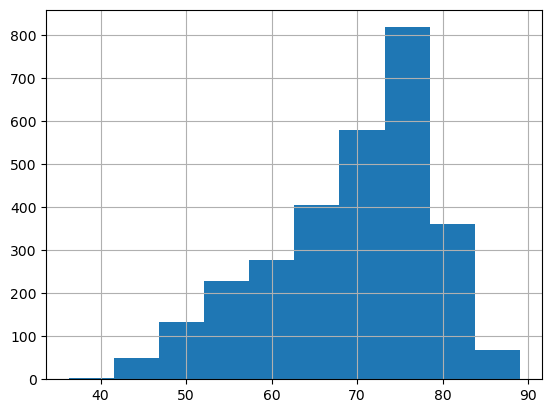

In [13]:
# Análise Exploratória dos Dados (variável target)
df['life_expectancy'].hist()

In [14]:
df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [15]:
# Função para plotar a relação da variável target com alguns demais atributos

def get_pairs(data, alvo, atributos, n):

    # Grupo de linhas (3 gráficos por linha)
    grp_linhas = [atributos[i:i + n] for i in range(0, len(atributos), n)]

    # Loop pelo grp de linhas
    for linha in grp_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [16]:
# Alvo
alvo = ['life_expectancy']

In [17]:
# Alguns Atributos
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

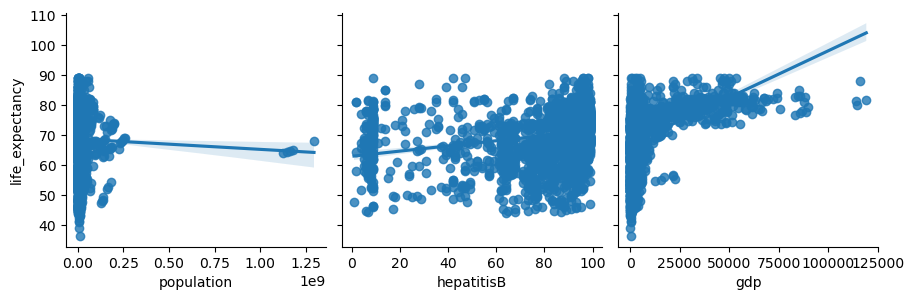

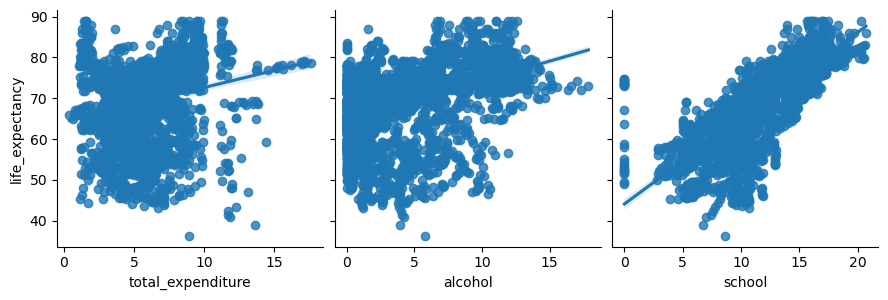

In [18]:
# Verificando Outliers
get_pairs(df, alvo, atributos, 3)

In [19]:
# Detecção de valores ausentes
df.shape

(2938, 19)

In [20]:
# Detecção de valores ausentes
df.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinness_till9       2904
school               2775
population           2286
dtype: int64

In [21]:
# Extraindo os totais de valores ausentes
val_ausentes = df.isnull().sum().sort_values(ascending = False)

In [22]:
print(val_ausentes)

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thinness_till9        34
thinness_till19       34
bmi                   34
polio                 19
diphtheria            19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64


In [23]:
# Calculando o percentual de valores ausentes
val_ausentes_percent = val_ausentes[val_ausentes > 0] / df.shape[0]

In [24]:
totais_ausentes = val_ausentes_percent.apply(lambda x: f'{x * 100:.2f} %')
print(totais_ausentes)

population           22.19 %
hepatitisB           18.82 %
gdp                  15.25 %
total_expenditure     7.69 %
alcohol               6.60 %
school                5.55 %
thinness_till9        1.16 %
thinness_till19       1.16 %
bmi                   1.16 %
polio                 0.65 %
diphtheria            0.65 %
life_expectancy       0.34 %
adult_mortality       0.34 %
dtype: object


In [25]:
# Detectando Outliers (atributos com mais de 5% de val_ausentes)
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

In [26]:
# Criando um novo DF
new_df = df[atributos]

In [27]:
# Identificação de OutLiers através do IQR (Intervalo Interquartil)
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

In [28]:
# Definindo outliers (padrão do IQR baseado em estatística)
outliers = ((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))).sum()

In [29]:
print(outliers)

population           294
hepatitisB           254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64


In [30]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(new_df)) * 100})

In [31]:
# Retornando os dados com seus outliers
outliers_summary[outliers_summary['Outliers'] > 0]

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


##### Remoção dos Outliers
- Como usarei algorítmos que se baseiam na média para algumas etapas de cálculos, irei remover

In [33]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [34]:
# Filtrando os outliers
novo_df= df[~((new_df < limite_inferior) | (new_df > limite_superior)).any(axis = 1)]

In [35]:
novo_df.shape

(2044, 19)

In [36]:
novo_df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


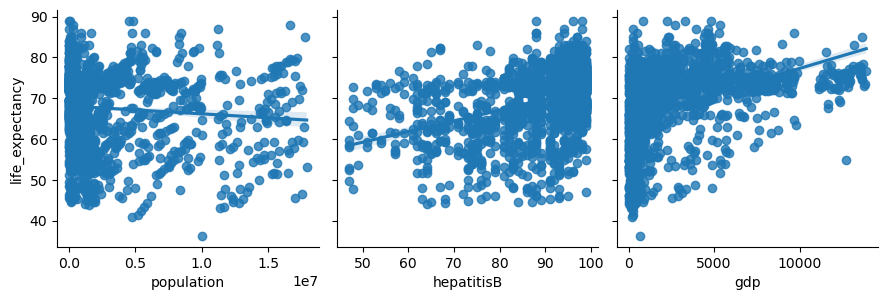

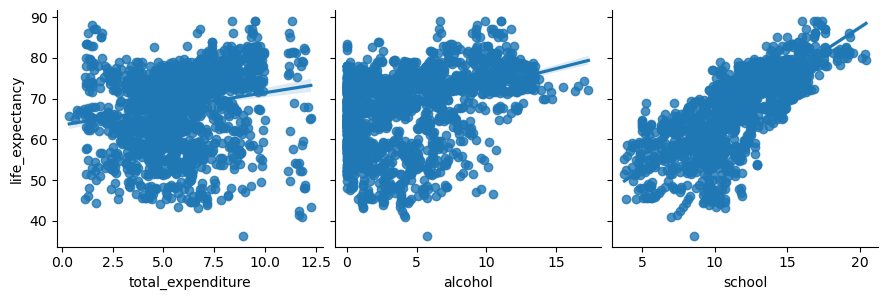

In [37]:
# Verificando novamente os Outliers com a função criada
get_pairs(novo_df, alvo, atributos, 3)

#### Tratando os valores ausentes
- Decisão: Irei preencher os valores com a mediana da variável
- Justificativa: Robustez (é menos sensível a outliers) e é a medida de tendência central mais apropriada do que a média.

In [39]:
# Calculando o percentual de valores ausentes
val_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [40]:
val_ausentes_percent = val_ausentes[val_ausentes > 0] / novo_df.shape[0]
print(f'{val_ausentes_percent * 100} %')

population           24.168297
hepatitisB           19.129159
gdp                  18.395303
total_expenditure     7.876712
alcohol               6.653620
school                6.555773
thinness_till9        0.587084
thinness_till19       0.587084
bmi                   0.587084
life_expectancy       0.391389
adult_mortality       0.391389
polio                 0.146771
diphtheria            0.146771
dtype: float64 %


In [41]:
val_ausentes_percent = val_ausentes_percent.apply(lambda x: f'{x * 100:.2f} %')
print(val_ausentes_percent)

population           24.17 %
hepatitisB           19.13 %
gdp                  18.40 %
total_expenditure     7.88 %
alcohol               6.65 %
school                6.56 %
thinness_till9        0.59 %
thinness_till19       0.59 %
bmi                   0.59 %
life_expectancy       0.39 %
adult_mortality       0.39 %
polio                 0.15 %
diphtheria            0.15 %
dtype: object


In [42]:
# Função para fazer o Replace das linhas vazias com a Mediana
def imputar_mediana(dados):
    return dados.fillna(dados.median())

In [43]:
# Removendo os valores missing com a imputação
novo_df.loc[:, 'population']        = novo_df['population'].transform(imputar_mediana)
novo_df.loc[:, 'hepatitisB']        = novo_df['hepatitisB'].transform(imputar_mediana)
novo_df.loc[:, 'alcohol']           = novo_df['alcohol'].transform(imputar_mediana)
novo_df.loc[:, 'total_expenditure'] = novo_df['total_expenditure'].transform(imputar_mediana)
novo_df.loc[:, 'gdp']               = novo_df['gdp'].transform(imputar_mediana)
novo_df.loc[:, 'school']            = novo_df['school'].transform(imputar_mediana)

In [44]:
# Conferindo os dados novamente para certificar se ainda existe valores missing
val_missing = novo_df.isnull().sum().sort_values(ascending = False)
print(val_missing)

bmi                  12
thinness_till9       12
thinness_till19      12
adult_mortality       8
life_expectancy       8
diphtheria            3
polio                 3
school                0
total_expenditure     0
gdp                   0
hiv                   0
country               0
measles               0
hepatitisB            0
alcohol               0
inf_death             0
status                0
year                  0
population            0
dtype: int64


In [45]:
# De forma percentual
val_ausentes_percent = val_missing[val_missing > 0] / novo_df.shape[0] 
val_ausentes_percent = val_ausentes_percent.apply(lambda x: f'{x * 100:.2f} %')
print(val_ausentes_percent)

bmi                0.59 %
thinness_till9     0.59 %
thinness_till19    0.59 %
adult_mortality    0.39 %
life_expectancy    0.39 %
diphtheria         0.15 %
polio              0.15 %
dtype: object


In [46]:
# Removendo os registros com valores nulos
novo_df.dropna(inplace=True)

In [47]:
# Conferindo os dados novamente para certificar se ainda existe valores missing (mais uma vez)
val_missing = novo_df.isnull().sum().sort_values(ascending = False)
print(val_missing)

country              0
polio                0
school               0
thinness_till9       0
thinness_till19      0
total_expenditure    0
gdp                  0
hiv                  0
diphtheria           0
bmi                  0
life_expectancy      0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
status               0
year                 0
population           0
dtype: int64


In [48]:
# De forma percentual (outra vez)
val_ausentes_percent = val_missing[val_missing > 0] / novo_df.shape[0] 
val_ausentes_percent = val_ausentes_percent.apply(lambda x: f'{x * 100:.2f} %')
print(val_ausentes_percent)

Series([], dtype: float64)


In [49]:
novo_df.shape

(2023, 19)

In [50]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2023 non-null   object 
 1   life_expectancy    2023 non-null   float64
 2   year               2023 non-null   int64  
 3   status             2023 non-null   object 
 4   adult_mortality    2023 non-null   float64
 5   inf_death          2023 non-null   int64  
 6   alcohol            2023 non-null   float64
 7   hepatitisB         2023 non-null   float64
 8   measles            2023 non-null   int64  
 9   bmi                2023 non-null   float64
 10  polio              2023 non-null   float64
 11  diphtheria         2023 non-null   float64
 12  hiv                2023 non-null   float64
 13  gdp                2023 non-null   float64
 14  total_expenditure  2023 non-null   float64
 15  thinness_till19    2023 non-null   float64
 16  thinness_till9     2023 non-n

In [51]:
# Dropando alguns atributos que não serão considerados (são dados categóricos)
novo_df.drop(['country', 'status'], axis = 1, inplace=True)

In [52]:
# Dataset original
dados.shape

(2938, 22)

In [53]:
# Dataset após a limpeza
novo_df.shape

(2023, 17)

#### Engenharia de Atributos

In [55]:
# Amostra de dados
novo_df.head()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
1,59.9,2014,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0
3,59.5,2012,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0
4,59.2,2011,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0
5,58.8,2010,279.0,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0
6,58.6,2009,281.0,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0


In [56]:
# Criando uma nova coluna
novo_df['lifestyle'] = 0
novo_df.lifestyle = novo_df['bmi'] * novo_df['alcohol']

In [57]:
# Amostra de dados com a coluna nova
novo_df.head()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,lifestyle
1,59.9,2014,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0,0.186
3,59.5,2012,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0,0.176
4,59.2,2011,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0,0.172
5,58.8,2010,279.0,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0,0.167
6,58.6,2009,281.0,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0,0.162


In [58]:
# Conferindo os dados novamente para certificar se ainda existe valores missing (mais uma vez)
val_missing = novo_df.isnull().sum().sum()
print(val_missing)

0


#### Análise de Correlação (avaliando se tem Multicolinearidade)

- **Correlação não implica Causalidade**

In [60]:
# Correlação das variáveis
novo_df.corr()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,lifestyle
life_expectancy,1.000000,0.204556,-0.658916,-0.206443,0.342425,0.257860,-0.115350,0.557954,0.452564,0.483659,-0.573127,0.360736,0.175738,-0.433580,-0.429357,0.708272,-0.105317,0.441366
year,0.204556,1.000000,-0.091760,-0.059838,-0.066639,-0.003178,-0.064347,0.096763,0.147489,0.228939,-0.158820,0.170945,0.070267,-0.059353,-0.055950,0.219471,0.020981,-0.017373
adult_mortality,-0.658916,-0.091760,1.000000,0.099370,-0.149204,-0.188950,0.035432,-0.366745,-0.228938,-0.221803,0.512978,-0.197863,-0.090963,0.299104,0.302507,-0.383901,0.096768,-0.231128
inf_death,-0.206443,-0.059838,0.099370,1.000000,-0.127545,-0.122515,0.480129,-0.221948,-0.183569,-0.183910,0.039115,-0.120331,-0.121871,0.321487,0.354512,-0.214215,0.111901,-0.156769
alcohol,0.342425,-0.066639,-0.149204,-0.127545,1.000000,0.193844,-0.045324,0.310448,0.187916,0.199958,-0.036268,0.289360,0.262657,-0.386629,-0.379482,0.464657,-0.007040,0.878858
hepatitisB,0.257860,-0.003178,-0.188950,-0.122515,0.193844,1.000000,-0.043089,0.115409,0.393191,0.391270,-0.090390,0.167829,0.046093,-0.086406,-0.102546,0.263879,-0.056455,0.181579
measles,-0.115350,-0.064347,0.035432,0.480129,-0.045324,-0.043089,1.000000,-0.142187,-0.110853,-0.123043,0.024412,-0.065666,-0.101675,0.133515,0.137056,-0.089084,-0.005326,-0.085123
bmi,0.557954,0.096763,-0.366745,-0.221948,0.310448,0.115409,-0.142187,1.000000,0.253961,0.273612,-0.244626,0.323198,0.200959,-0.541904,-0.550691,0.552766,-0.056945,0.599062
polio,0.452564,0.147489,-0.228938,-0.183569,0.187916,0.393191,-0.110853,0.253961,1.000000,0.676507,-0.143756,0.198453,0.141294,-0.166819,-0.166363,0.382712,-0.045542,0.219793
diphtheria,0.483659,0.228939,-0.221803,-0.183910,0.199958,0.391270,-0.123043,0.273612,0.676507,1.000000,-0.154179,0.222266,0.157976,-0.189487,-0.186992,0.430627,-0.035142,0.225132


In [61]:
# Criando uma função para filtrar e visualizar a correlação
def correlacao_filtrada(df, threshold, drop_column = None):

    # Calcula a matriz
    corr = df.corr()

    # Aplicação do filtro
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filter = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')

    # Removendo a coluna e linha especificada, se for o caso
    if drop_column:
        df_filter = df_filter.drop(index = drop_column,
                                   errors = 'ignore').drop(columns = drop_column, errors = 'ignore')

    # Visualizando o resultado
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filter, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

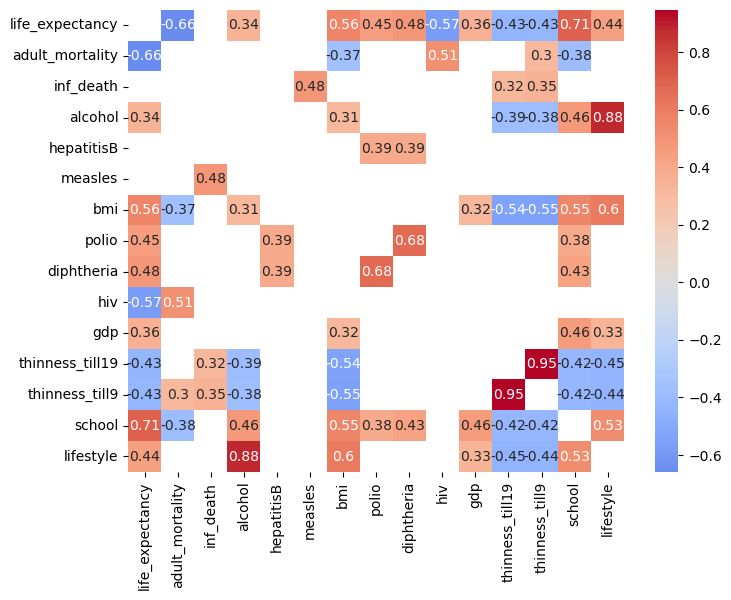

In [62]:
# Executando a função
correlacao_filtrada(novo_df, threshold=0.3, drop_column=None)

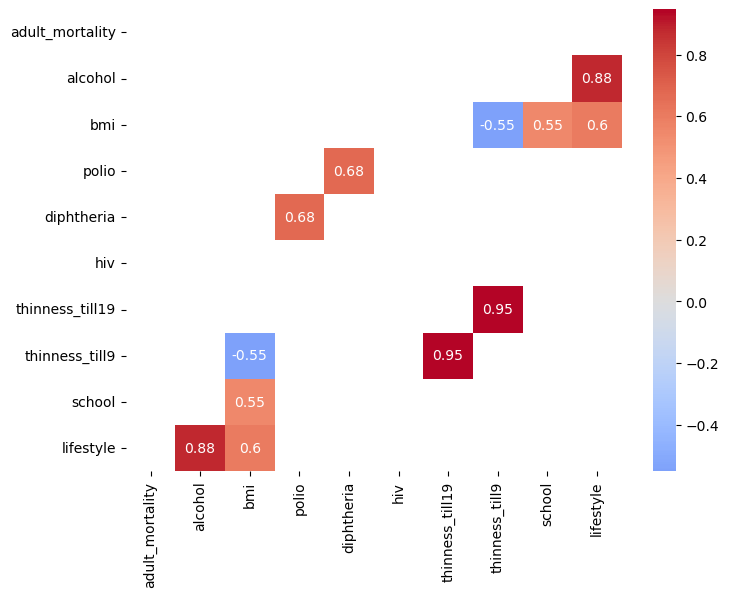

In [63]:
# Executando a função para analisar a correlação entre as variáveis preditoras
correlacao_filtrada(novo_df, threshold = 0.55, drop_column = 'life_expectancy')

##### Decisão

- **Com base no primeiro filtro (olhando para a variável target):**
As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao primeiro critério. São as variáveis preditoras com maior correlação com a variável alvo.

- **Com base no segundo filtro  - Multicolinearidade**
As variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle serão as variáveis mantidas para a modelagem estatística.

In [65]:
# Preparando o novo dataset
dataset = pd.DataFrame({'life_expectancy': novo_df['life_expectancy'],
                        'adult_mortality': novo_df['adult_mortality'],
                        'diphtheria': novo_df['diphtheria'],
                        'hiv': novo_df['hiv'],
                        'gdp': novo_df['gdp'],
                        'thinness_till19': novo_df['thinness_till19'],
                        'school': novo_df['school'],
                        'lifestyle': novo_df['lifestyle'],})

In [66]:
dataset.head()

,life_expectancy,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school,lifestyle
1,59.9,271.0,62.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,669.959000,17.9,9.8,0.176
4,59.2,275.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,445.893298,18.6,8.9,0.162


In [67]:
dataset.shape

(2023, 8)

In [68]:
# Conferindo os novos dados
missing = dataset.isnull().sum().sum()
print(missing)

0


In [69]:
dataset.count()

life_expectancy    2023
adult_mortality    2023
diphtheria         2023
hiv                2023
gdp                2023
thinness_till19    2023
school             2023
lifestyle          2023
dtype: int64

In [70]:
dataset.dtypes

life_expectancy    float64
adult_mortality    float64
diphtheria         float64
hiv                float64
gdp                float64
thinness_till19    float64
school             float64
lifestyle          float64
dtype: object

#### Usando Machine Learning para encontrar as variáveis mais relevantes

In [72]:
# Separação dos dados
X = dataset.drop('life_expectancy', axis = 1)
y = dataset['life_expectancy']

In [73]:
# Separação de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [74]:
# Realizando o treinamento para depois extrair as melhores variáveis
modelo = RandomForestRegressor(n_estimators = 100, random_state = 42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
# Previsões em teste
y_pred = modelo.predict(X_test)

In [76]:
# Avaliação do modelo
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [77]:
# Resultado RMSE
print(f'RMSE: {rmse}')

RMSE: 2.0023653247664783


In [78]:
# Resultado R2 Score em (%)
r2 = metrics.r2_score(y_test, y_pred) * 100
print(f'R2 Score: {r2:.2f}')

R2 Score: 95.35


In [79]:
# Identificando as variáveis com maior importância
importtancias = modelo.feature_importances_
variaveis = X.columns

In [80]:
# Criar um DF com as variáveis de maior inportância
import_df = pd.DataFrame({'Variável': variaveis,
                          'Importância': importtancias}).sort_values(by = 'Importância', ascending = False)

print(import_df)

          Variável  Importância
2              hiv     0.607101
0  adult_mortality     0.224181
5           school     0.073162
4  thinness_till19     0.037829
6        lifestyle     0.031248
1       diphtheria     0.017064
3              gdp     0.009415


**Os resultados mostram a importância, que é uma medida de quanto cada variável contribui para a precisão do modelo.**
- Assim, irei remover a variável (gdp) por ser a menos relevante.

In [82]:
# Dropando a coluna (gdp)
dataset_final = dataset.drop('gdp', axis = 1)

In [83]:
dataset_final.head()

,life_expectancy,adult_mortality,diphtheria,hiv,thinness_till19,school,lifestyle
1,59.9,271.0,62.0,0.1,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,17.9,9.8,0.176
4,59.2,275.0,68.0,0.1,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,18.6,8.9,0.162


#### Pré Processamento dos Dados

In [85]:
# Split dos dados (retornando os dados como um array)
X = dataset_final[['hiv', 'adult_mortality', 'school', 'thinness_till19', 'lifestyle', 'diphtheria']].values
y = dataset_final['life_expectancy'].values.reshape(-1, 1)

In [86]:
# Separação de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
len(X_train)

1618

In [88]:
len(y_train)

1618

In [89]:
len(X_test)

405

In [90]:
len(y_test)

405

In [91]:
# Criando o Padronizador
scaler = StandardScaler()

In [92]:
# Fit com dados de treino (padronizando somente os dados de treino)
scaler.fit(X_train)

StandardScaler()

In [93]:
# Aplicando o scaler (transform) em treino e teste
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [94]:
x_train_scaled.shape

(1618, 6)

In [95]:
x_test_scaled.shape

(405, 6)

#### Modelagem Preditiva

##### Versão 1 - Modelo Benchmark

In [98]:
# Modelo
modelo_v1 = LinearRegression()

In [99]:
# Treinando o modelo
modelo_v1.fit(x_train_scaled, y_train)

LinearRegression()

In [100]:
# Previsões do Modelo
y_pred_train_v1 = modelo_v1.predict(x_train_scaled)

In [101]:
# Print das metricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v1)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v1))

Mean Absolute Error: 3.293873806238307
Mean Squared Error: 19.126908598507324
Root Mean Squared Error: 4.373432130319085
R2 Score: 0.7716436538450326


#### Avaliação do Modelo

In [103]:
# Previsão com dados de Teste (padronizados)
y_pred_test_v1 = modelo_v1.predict(x_test_scaled)

In [104]:
# Data Frame com as previsões e valores reais
df_previsoes = pd.DataFrame({'Valor_Real': y_test.flatten(), 'Valor_Previsto': y_pred_test_v1.flatten()})

In [105]:
# Visualizando lado a lado
df_previsoes.head()

,Valor_Real,Valor_Previsto
0,61.6,62.876511
1,78.0,74.388275
2,66.0,64.315209
3,73.5,71.951120
4,79.0,71.677322


In [106]:
# Caldulando as Metricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v1)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v1))

Mean Absolute Error: 3.3063524325380858
Mean Squared Error: 19.07740050046435
Root Mean Squared Error: 4.367768366164162
R2 Score: 0.7787867058604524


### Versão 2 - Modelo Regressão Lasso

In [108]:
# Modelo
modelo_v2 = Lasso(alpha = 1.0)

In [109]:
# Treinando o modelo
modelo_v2.fit(x_train_scaled, y_train)

Lasso()

In [110]:
# Previsões com dados de Treino
y_pred_train_v2 = modelo_v2.predict(x_train_scaled)

In [111]:
# Caldulando as Metricas com dados de Treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v2)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v2))

Mean Absolute Error: 3.5221990103257323
Mean Squared Error: 21.60238910073605
Root Mean Squared Error: 4.64783703465774
R2 Score: 0.7420888682634812


In [112]:
# Previsão com dados de Teste
y_pred_test_v2 = modelo_v2.predict(x_test_scaled)

In [113]:
# Caldulando as Metricas com dados de Teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v2)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v2))

Mean Absolute Error: 3.4928436416127084
Mean Squared Error: 21.356815351900806
Root Mean Squared Error: 4.621343457470004
R2 Score: 0.7523555960253052


### Versão 3 - Modelo Regressão Ridge

In [115]:
# Modelo
modelo_v3 = Ridge(alpha = 1.0)

In [116]:
# Treinamento do modelo
modelo_v3.fit(x_train_scaled, y_train)

Ridge()

In [117]:
# Previsões do modelo com dados de Treino
y_pred_train_v3 = modelo_v3.predict(x_train_scaled)

In [118]:
# Caldulando as Metricas com dados de Treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v3)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v3))

Mean Absolute Error: 3.293937281268287
Mean Squared Error: 19.12691660550889
Root Mean Squared Error: 4.373433045732939
R2 Score: 0.7716435582493638


In [119]:
# Previsões do modelo com dados de Teste
y_pred_test_v3 = modelo_v3.predict(x_test_scaled)

In [120]:
# Caldulando as Metricas com dados de Teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v3)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v3))

Mean Absolute Error: 3.3063504575852116
Mean Squared Error: 19.076573876245064
Root Mean Squared Error: 4.367673737385276
R2 Score: 0.7787962910377704


### Versão 4 - Modelo Regressão Elastic Net

In [122]:
# Modelo
modelo_v4 = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [123]:
# Treinamento do modelo com dados de Treino
modelo_v4.fit(x_train_scaled, y_train)

ElasticNet()

In [124]:
# Previsões do modelo com dados de Treino
y_pred_train_v4 = modelo_v4.predict(x_train_scaled)

In [125]:
# Caldulando as Metricas com dados de Treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v4)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v4))

Mean Absolute Error: 3.7542906479254694
Mean Squared Error: 23.54516090692446
Root Mean Squared Error: 4.8523356135910936
R2 Score: 0.7188940969396567


In [126]:
# Previsões do modelo com dados de Teste
y_pred_test_v4 = modelo_v4.predict(x_test_scaled)

In [127]:
# Caldulando as Metricas com dados de Teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v4)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v4))

Mean Absolute Error: 3.7163972023866845
Mean Squared Error: 23.38360875198177
Root Mean Squared Error: 4.835660115432201
R2 Score: 0.728853775399309


### Versão 5 - Modelo Regressão Ridge com Otimização de Hiperparâmetros

In [129]:
# Modelo
modelo_v5 = Ridge()

In [130]:
# Definição dos hiperparâmetros para otimização
parametros = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [131]:
# Coonfigurando o Grid
grid_search = GridSearchCV(estimator = modelo_v5,
                           param_grid = parametros,
                           cv = 5,
                           scoring = 'neg_mean_squared_error',
                           verbose = 1)

In [132]:
# Treinamento com o otimizador
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [133]:
# Melhor modelo
best_model = grid_search.best_estimator_

In [134]:
# Previsão com os dados de Treino
y_pred_train_v5 = best_model.predict(x_train_scaled)

In [135]:
# Caldulando as Metricas com dados de Treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v5)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v5))

Mean Absolute Error: 3.2945689051534104
Mean Squared Error: 19.127698123617
Root Mean Squared Error: 4.3735223931765805
R2 Score: 0.7716342276971366


In [136]:
# Previsão com os dados de Teste
y_pred_test_v5 = best_model.predict(x_test_scaled)

In [137]:
# Caldulando as Metricas com dados de Teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v5))

Mean Absolute Error: 3.3066155990452537
Mean Squared Error: 19.07004701221093
Root Mean Squared Error: 4.366926494940226
R2 Score: 0.7788719737332905


In [138]:
# Imprimindo o melhor Alpha
print('Melhor Alpha:', grid_search.best_params_['alpha'])

Melhor Alpha: 10


#### Seleção do Modelo

In [140]:
print('RMSE v1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v1)))
print('RMSE v2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v2)))
print('RMSE v3:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v3)))
print('RMSE v4:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v4)))
print('RMSE v5:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5)))

RMSE v1: 4.367768366164162
RMSE v2: 4.621343457470004
RMSE v3: 4.367673737385276
RMSE v4: 4.835660115432201
RMSE v5: 4.366926494940226


In [141]:
r2_score_v1 = metrics.r2_score(y_test, y_pred_test_v1)
r2_score_v1 = "{:.2f} %".format(r2_score_v1 * 100)
# Imprimindo o resultado
print('R2 Score v1:', r2_score_v1)


r2_score_v2 = metrics.r2_score(y_test, y_pred_test_v2)
r2_score_v2 = "{:.2f} %".format(r2_score_v2 * 100)
# Imprimindo o resultado
print('R2 Score v2:', r2_score_v2)

r2_score_v3 = metrics.r2_score(y_test, y_pred_test_v3)
r2_score_v3 = "{:.2f} %".format(r2_score_v3 * 100)
# Imprimindo o resultado
print('R2 Score v3:', r2_score_v3)

r2_score_v4 = metrics.r2_score(y_test, y_pred_test_v4)
r2_score_v4 = "{:.2f} %".format(r2_score_v4 * 100)
# Imprimindo o resultado
print('R2 Score v4:', r2_score_v4)

r2_score_v5 = metrics.r2_score(y_test, y_pred_test_v5)
r2_score_v5 = "{:.2f} %".format(r2_score_v5 * 100)
# Imprimindo o resultado
print('R2 Score v5:', r2_score_v5)

R2 Score v1: 77.88 %
R2 Score v2: 75.24 %
R2 Score v3: 77.88 %
R2 Score v4: 72.89 %
R2 Score v5: 77.89 %


- Escolherei o modelo v1 para o deploy pois trata-se do modelo mais simples e a performance é basicamente o mesmo com as demais versões v3 e v5 (que são mais complexas).

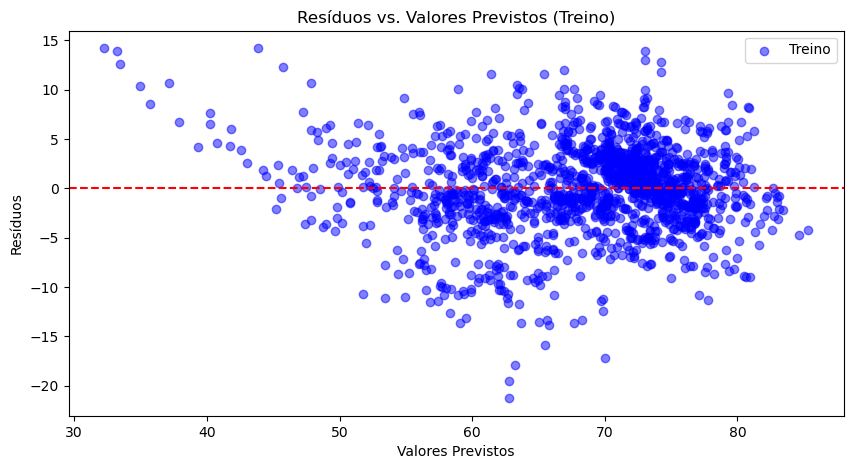

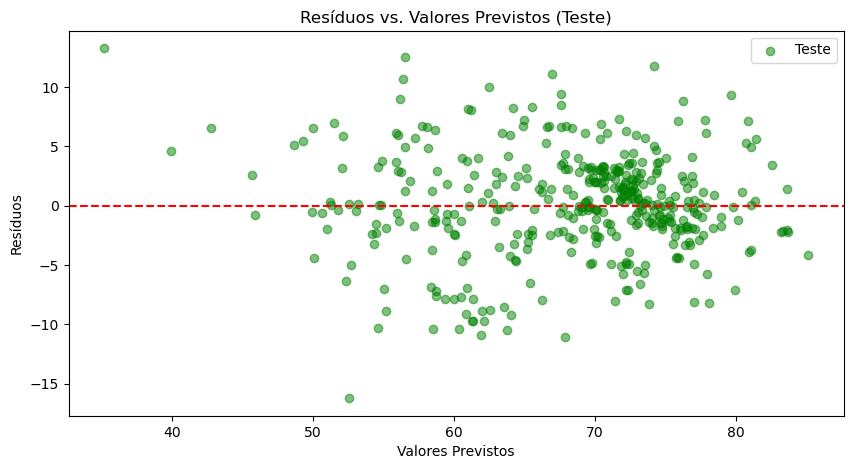

In [143]:
# Calculando os resíduos para o conjunto de treino
residuos_treino = y_train - y_pred_train_v1

# Calculando os resíduos para o conjunto de teste
residuos_teste = y_test - y_pred_test_v1

# Plotando os resíduos do conjunto de treino
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_train_v1, residuos_treino, color = 'blue', label = 'Treino', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Treino)')
plt.legend()
plt.show()

# Plotando os resíduos do conjunto de teste
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_test_v1, residuos_teste, color = 'green', label = 'Teste', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Teste)')
plt.legend()
plt.show()

**Nestes gráficos, não identifico um padrão claro (o ideal é estar distribuído de forma aleatória) mostrando ser um modelo equilibrado.**

In [145]:
# Salvando o Padronizador
joblib.dump(scaler, 'scaler_deploy.pkl')

['scaler_deploy.pkl']

In [146]:
# Salvando o Modelo
joblib.dump(modelo_v1, 'modelo_v1_deploy.pkl')

['modelo_v1_deploy.pkl']

#### Deploy do Modelo

In [148]:
# Carregando o modelo e o padronizador
scaler = joblib.load('scaler_deploy.pkl')
modelo = joblib.load('modelo_v1_deploy.pkl')

In [149]:
# Carregando novos dados
dados = pd.read_csv('novos_dados.csv')

In [150]:
dados.head()

,hiv,adult_mortality,school,thinness_till19,lifestyle,diphtheria
0,0.1,44.2,9.3,12.7,0.922,98.0


In [151]:
# Padronizando os novos dados
dados_padrornizados = scaler.transform(dados)

In [152]:
# Dados padronizados
dados_padrornizados

array([[-0.33212562, -1.02407659, -0.9236211 ,  1.93142763, -0.84615162,
         0.65791977]])

In [153]:
# Realizando previsões
previsao = modelo.predict(dados_padrornizados)

In [154]:
type(previsao)

numpy.ndarray

In [155]:
print('De acordo com os dados de entrada, a expectativa de vida (em anos) é de aproximadamente:', np.round(previsao, 2))

De acordo com os dados de entrada, a expectativa de vida (em anos) é de aproximadamente: [[67.75]]


In [156]:
%reload_ext watermark
%watermark -a "Marcelo Medeiros | Cientista de Dados"

Author: Marcelo Medeiros | Cientista de Dados



In [157]:
# Versões dos pacotes
%watermark -v -m

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [158]:
%watermark --iversions

seaborn   : 0.12.2
json      : 2.0.9
numpy     : 1.24.3
joblib    : 1.2.0
pandas    : 2.0.3
sklearn   : 1.3.0
matplotlib: 3.7.2



# FIM